# Problem Statement:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
## Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

## Load the data

In [3]:
company = pd.read_csv('company.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA

In [4]:
company.shape

(400, 11)

<AxesSubplot: >

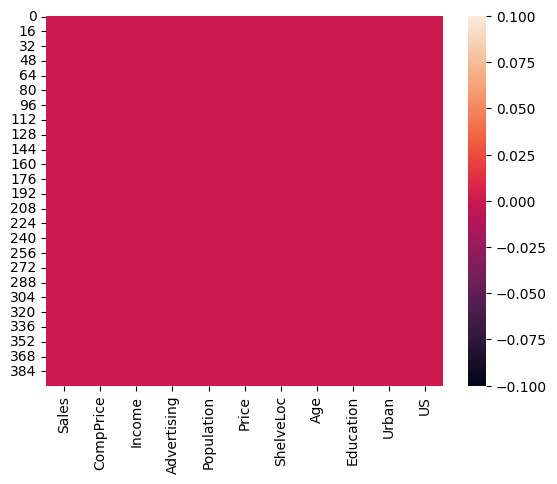

In [6]:
sns.heatmap(company.isnull())

In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Feature Engineering

In [8]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot: xlabel='Sales', ylabel='Count'>

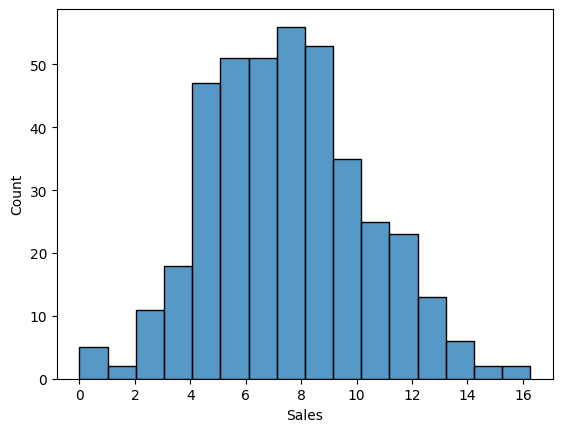

In [10]:
sns.histplot(company['Sales'])

In [11]:
# the mean and the median of the 'Sales' column is approximately 7.5.

company['Sales'] = [1 if x>=7.5 else 0 for x in company['Sales']]
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


<AxesSubplot: xlabel='Sales', ylabel='count'>

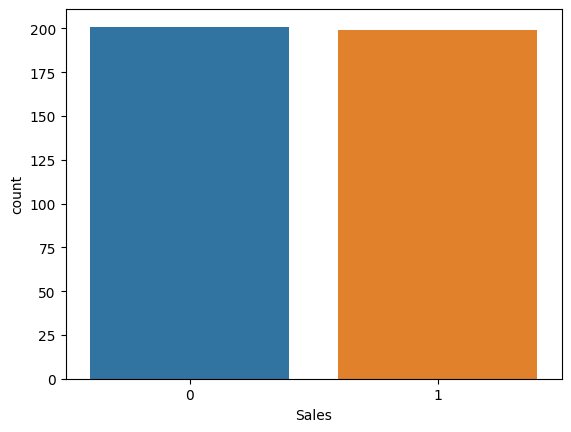

In [14]:
sns.countplot(data=company, x='Sales')

In [12]:
# For 'Urban' and 'US' column
# Yes:1 , No:0 , Good:2 , Medium : 1 , Bad : 0 
company = company.replace({'Yes':1,'No':0,'Bad':0,'Medium':1,'Good':2})
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,2,65,10,1,1
2,1,113,35,10,269,80,1,59,12,1,1
3,0,117,100,4,466,97,1,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [16]:
num_columns = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
cat_columns = ['ShelveLoc', 'Urban', 'US']

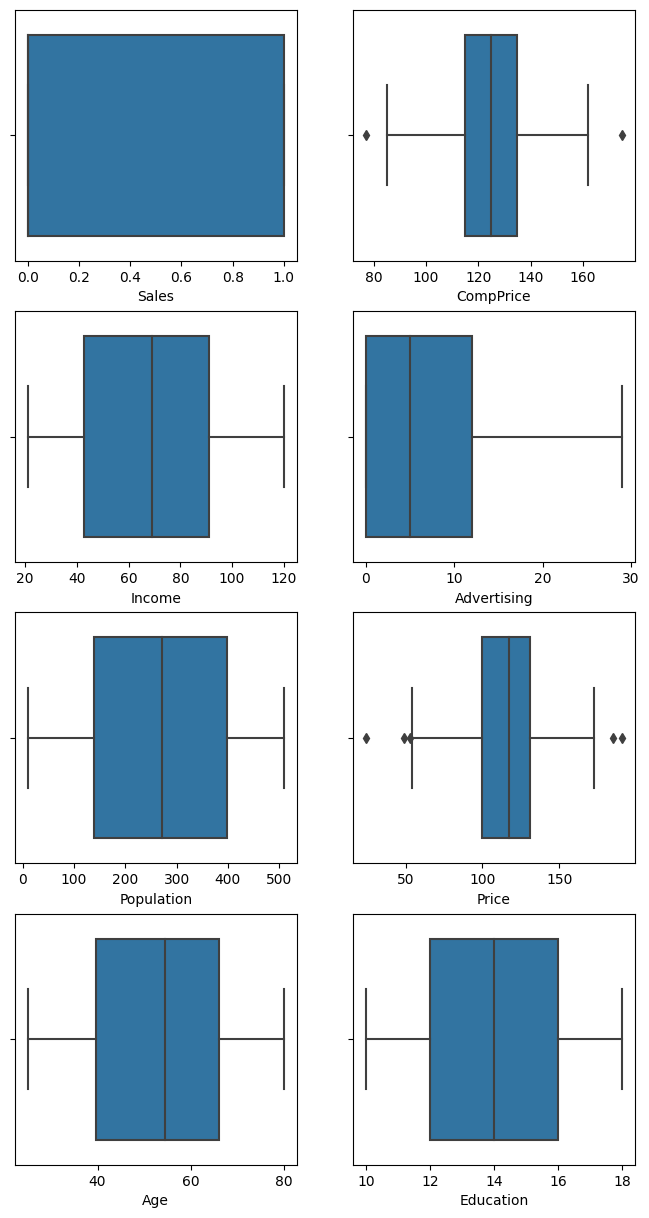

In [24]:
plt.figure(figsize=(8,15))
for i in range(len(num_columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=company, x=num_columns[i])

<AxesSubplot: xlabel='Price'>

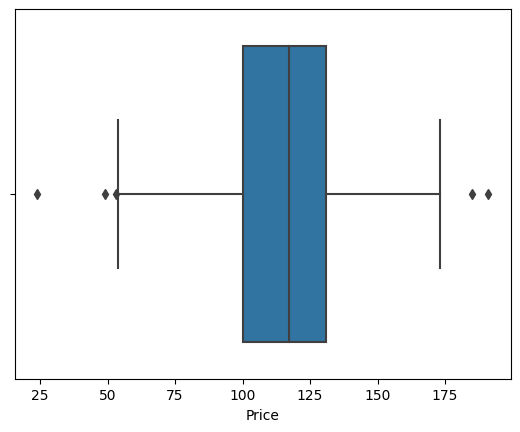

In [31]:
sns.boxplot(data=company, x= 'Price')


<AxesSubplot: xlabel='CompPrice'>

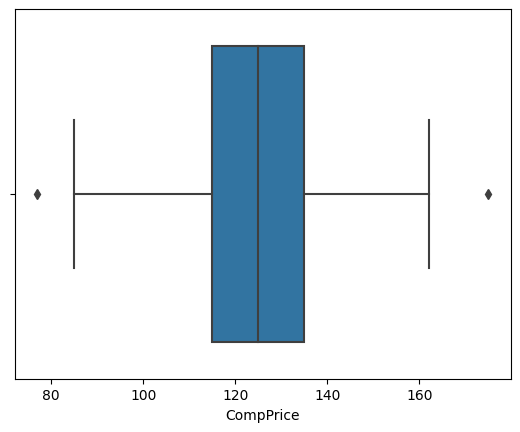

In [32]:
sns.boxplot(data=company, x= 'CompPrice')

In [37]:
# Check the index of the outliers

print(f"Outlier Index of Price column : {company[company['Price']>175].index}")
print(f"Outlier Index of Price column : {company[company['Price']<50].index}")

print(f"Outlier Index of Price column : {company[company['CompPrice']<80].index}")
print(f"Outlier Index of Price column : {company[company['CompPrice']>165].index}")

Outlier Index of Price column : Int64Index([165, 174], dtype='int64')
Outlier Index of Price column : Int64Index([42, 125], dtype='int64')
Outlier Index of Price column : Int64Index([42], dtype='int64')
Outlier Index of Price column : Int64Index([310], dtype='int64')


In [39]:
# Drop outliers
company.drop(company[company['Price']>175].index, axis=0, inplace=True)
company.drop(company[company['Price']<50].index, axis=0, inplace=True)
company.drop(company[company['CompPrice']>165].index, axis=0, inplace=True)

## Data preparation

In [43]:
x = company.iloc[:,1:]
y = company.iloc[:,0]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

## Looking for best model

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

num_trees = [20, 50, 150,200]
tree_depth = [5, 10, 20]
criteria = ['gini','entropy']
max_features = ['sqrt','log2',None]
rfc = RandomForestClassifier(random_state=2)
param_grid = dict(n_estimators=num_trees, max_depth = tree_depth,max_features=max_features,criterion=criteria)
grid = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=20
[CV 1/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=20;, score=0.848 total time=   0.0s
[CV 2/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=20
[CV 2/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=20;, score=0.772 total time=   0.0s
[CV 3/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=20
[CV 3/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=20;, score=0.785 total time=   0.0s
[CV 4/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=20
[CV 4/5; 1/72] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=20;, score=0.734 total time=   0.0s
[CV 5/5; 1/72] START criterion=gini, max_depth=5, max_features=sqrt, n_estimators=20
[CV 5/5; 1/72] END criterion=gini, max_depth=5, m

In [51]:
print(f'Best model : {grid_result.best_score_} using {grid_result.best_params_}')

Best model : 0.8202531645569622 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'n_estimators': 200}


## Model Building

In [52]:
model = RandomForestClassifier(criterion='entropy',max_depth=10,max_features=None,n_estimators=200)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       n_estimators=200)

## Performance of model on test set

In [53]:
result = model.score(x_test,y_test)
result

0.8383838383838383

## Feature importance

In [55]:
model.feature_importances_

array([0.14034428, 0.08908124, 0.11818247, 0.06102434, 0.29781008,
       0.12604153, 0.10927422, 0.03913021, 0.00982648, 0.00928515])

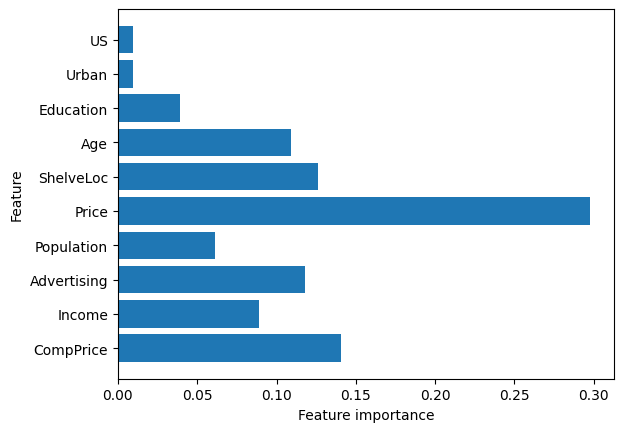

In [56]:
def plot_feature_importances(x_train,model):
	n_features = x_train.shape[1]
	plt.barh(range(n_features), model.feature_importances_, align='center')
	plt.yticks(np.arange(n_features),x_train.columns)
	plt.xlabel("Feature importance")
	plt.ylabel("Feature")

plot_feature_importances(x_test,model)

## Price is best feature, but we can't ignore the importance of other features too